# Introduction

### Introduction:

RNA sequencing has become an essential part of biological studies. It has allowed researchers to quantify gene expression in biological samples allowing for deeper insights into the mechanisms of tissues, cells, and how genes are regulated. This has led to an explosion of new discoveries as the comparison of gene expression profiles between diseased and normal tissue has led to better understanding of mechanisms behind disease, new drug discoveries and countless other new discoveries.

### General Problem:

However, RNA sequencing comes with its own challenges. Some measurements may be unreliable as some regions of the genome are harder to sequence due to their complexity or their high similarity to other sequences. RNA seq data can also suffer from low quality, due to degradation from old tissue samples or from errors in extraction and sequencing of RNA. In other cases the data from certain genes may not be reported out at all if they were not of interest to the original study. These issues have led to the need for data imputation, especially when working with public datasets.

Many genes that participate in the same biological process often have correlated expressions which has led to the theory that expression of missing genes can be recovered. However, doing so is not a simple task and is complicated further by the large number of genes, and tissue specific expression profiles. In the past imputation has been performed by taking the average expression of the K nearest neighbors (KNN). However these results are imperfect. Other more complicated methods have been made including MICE (Santaniello et al) which improves the nearest neighbors method by applying RReliefF algorithm first to filter the samples (Robnik-Šikonja et al). MissForest is another imputation algorithm using a random forest model that has also improved on KNN (Stekhoven et al). GAIN GTE-x aims to improve imputation by using a generative adversarial imputation network to impute data.


# Paper Methods

In the paper "Deep Learning Enables Fast and Accurate Imputation of Gene Expression" two new methods are proposed to impute RNA seq scores. The first is a Pseudo-Mask Imputation (PMI) and the second is Generative Adversarial Imputation Network (GAIN). 

The PMI model uses 4 fully connected layers of size 256 by default with relu activation function. The generator takes as input a matrix of gene expression as well as a one hot vector for categorical variables such as tissue type and sex and a numerical vector for age. Half of the data is masked by default while the PMI guesses their value. The loss function is the mean squared error of the difference between imputed masked values and their actual values.

The GAIN GTE-x  generator and discriminator are each 4 layered fully connected layers with relu activation function the size of the hidden layers is by default set to 256. The generator takes as input a matrix of gene expression as well as a one hot vector for categorical variables such as tissue type and sex. The final activation function for the discriminator is a sigmoid function. The model generator and discriminator are each trained using cross entropy loss. The loss for the discriminator is the entropy loss based on how many genes it guesses are imputed incorrectly and the loss for the generator is the entropy loss for how many genes the discriminator guessed correctly. The loss for the generator without using the discriminator is the mean squared error. The discriminator is given the identity of the masks of some of the data as “hints” to help train it but this data is not included in the loss function.

A diagram of the models can be found in figure 1 below

## Figure 1: Model Architecture

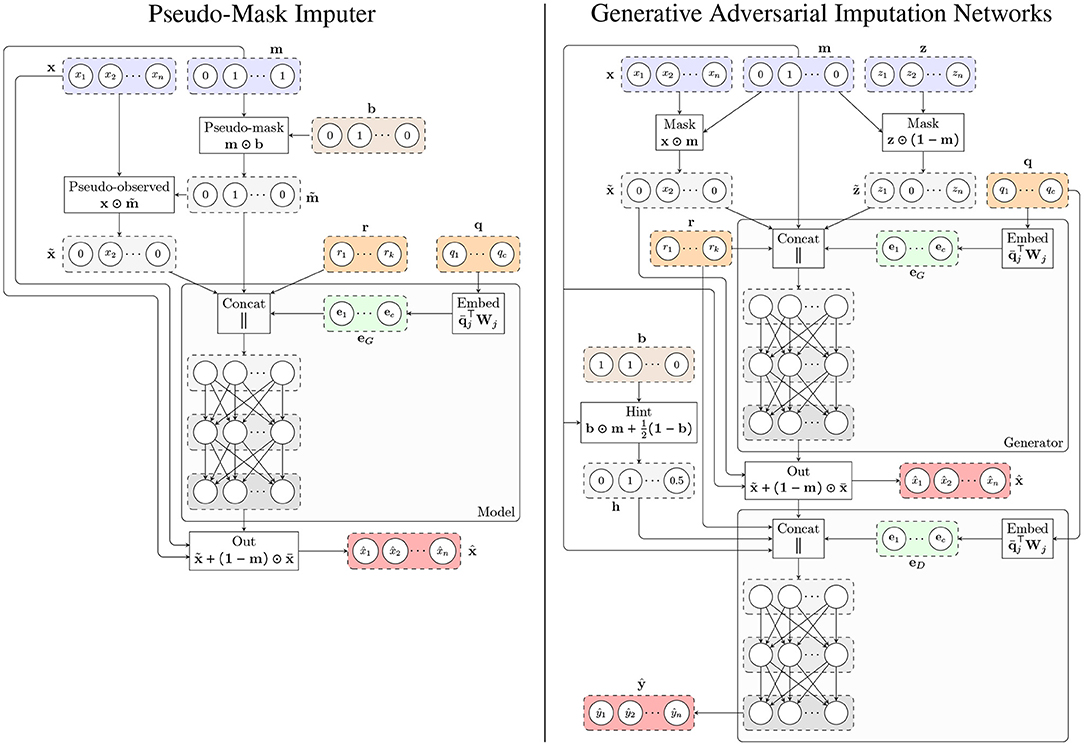





# Paper Results

In the paper they compared their imputations through $R^{2}$ coefficient between imputed values and real values. Their imputation methods were compared to using state of the art imputation packages such as MICE, Miss Forest as well as using Blood as a surrogate, Median expression and nearest neighbor. Results were reported on ~12,000 protein coding genes as well as a subset of 273 Alzheimer related genes to use to keep computation time down for MICE and Miss Forest which were too computationally expensive to be used on the entire set of protein coding genes. The methods were tested both in place (using GTEX data to predict GTEX data), and inductively (using GTEX trained models to predict TCGA data).

## Table 1: Performance of Imputation Methods on Protein Coding Genes

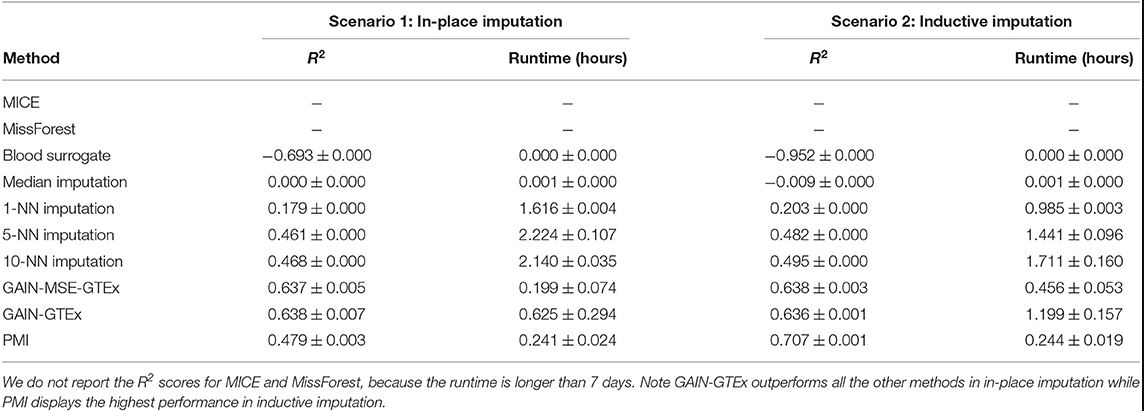

MICE and Miss Forest were not used as they were too computationally expensive to run on all protein coding genes. Gain GTEX was the best method for in place imputation while PMI was the best model for inductive imputation

## Table 2: Performance of Imputation Methods on Alzheimer Genes

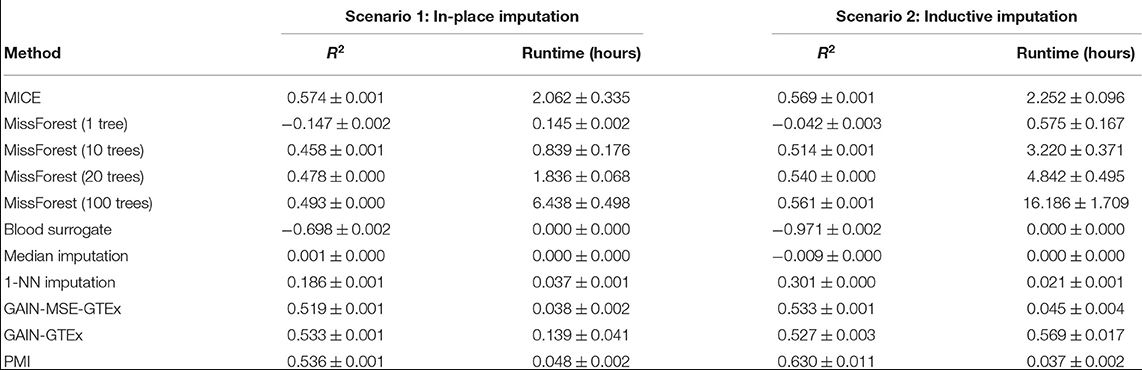

MICE was found to be the best model for in-place imputation in the alzheimer gene dataset while PMI was found to be the best at inductive imputation

Overall their PMI method showed greater improvements than their GAIN network but neither beat the MICE model when imputing on in-place dataset.

# Scope of Reproducibility:

To test the models, the models will be run with p53 related genes, an important pathway in cancer that is common in all tissues. This is a smaller subset of 65 genes that will be easier to compute and be more generalized than the Alzheimer genes tested in the paper. In addition to this, it will test the ability of the model to generalize to the cancer space after being trained on normal tissue as their expression should be different in cancerous cells. These genes will be used to test the following hypothesis.

Hypothesis 1: PMI and or GAIN-GTEX out performs MICE, nearest neighbor and median imputation in inductive imputation.

Hypothesis 2: PMI and or GAIN-GTEX out performs MICE, nearest neighbor and median imputation in in-place imputation.

Hypothesis 3 and ablation: PMI out performs GAIN-GTEX  in inductive imputation despite being a less sophisticated model without a discriminator. 

While the results from the paper show that GAIN and PMI may not beat previous methods, we will still test assuming that they will.



# Methodology

This methodology is the core of your project. It consists of run-able codes with necessary annotations to show the expeiment you executed for testing the hypotheses.

The methodology at least contains two subsections **data** and **model** in your experiment.

##  Data


Data will consist of GTEx lung and colon samples for training and in-place imputation testing as well as TCGA lung and colon cancer data for inductive imputation testing. There are 581 lung samples and 409 colon samples in the GTEx dataset and 586 lung cancer samples and 640 colon cancer samples in the TCGA dataset.

GTEx Data:
URL: https://gtexportal.org/home/downloads/adult-gtex/bulk_tissue_expression

The data files used are:
gene_reads_2017-06-05_v8_lung.gct
gene_reads_2017-06-05_v8_colon_transverse.gct
GTEx_Analysis_v8_Annotations_SubjectPhenotypesDS.txt

TCGA:
 The cancer genome atlas, a database of genomic and clinical data for various cancers. The data is readily available at cbioportal where it has been made easier to download.
URL: https://www.cbioportal.org/

 
The data sets used are
Colorectal Adenocarcinoma (TCGA, Firehose Legacy)
Lung Adenocarcinoma (TCGA, Firehose Legacy) 
 
Data Cleaning:

Dat cleaning script can be found here:
https://github.com/AlexHakansson/CS598_Project_GAIN_GTEX/blob/main/Data_Cleaning/project_preprocessing_clean.R

The train test split is done with 75:25 ratio and is done within the model generation code itself. Validation samples are split from the training samples with the same ratio.



##   Model

The 2 models as described above are the GAIN and PMI models. The parameters of each of the models can be easily modified through the configuration file, including the learning rate, number of layers, and the probability of masking.

### GAIN GTEx

The generator part of the gain model consists of dense hidden layers all of the same size. Batch normalization is performed (if specified) followed by ReLU activation function followed by a dropout. The discriminator is the same form as the generator and the parameters are shared between them. For the initial the models were made 4 layers of size 200, and a dropout rate of .2 and batch normalization. Sigmoid cross entropy loss is used to determine loss for both the generator and discriminator with the discriminator being penalized for incorrect guesses and the generator penalized for correct guesses. The code for the models can be found in “gain_gtex_imputer.py” under the models folder.

### PMI
The PMI takes uses the “base_imputer.py” model. This model is nearly identical to the generator and discriminator models. It too has dense layers all of the same size with batch normalization (if specified in config), followed by ReLU activation function and a specified dropout rate. For the initial model the same parameters were used for the PMI model as the GAIN model. The penalty used is mean squared error between predicted and actual values for masked items.


# Methodologies

Here we have the code to train an imputation model. This code is adapted from “imputation.py” from the GAIN-GTEx repository. It takes as input a config file which specifies the type of imputation model being generated, number of layers, size of each layer among other things.

## Computational requirements

Because we have limited the number of genes to the 65 p53 genes the code runs quickly without much memory requirements and should be able to run on 8GB of RAM. The machine used to run this code has 16 GB of RAM and a 3.7 Hz Processor.


In [54]:
### general training file. Takes in a yaml config file to determine type and parameters of model

from models.models import get_model
import tensorflow as tf
import wandb
from wandb.keras import WandbCallback
from data.generators import get_generator
from data.eval_utils import r2_scores
import numpy as np
import argparse
import yaml
import time
import os
import pickle

tfk = tf.keras
tfkl = tf.keras.layers


def train(config):
    # Load data
    generator = get_generator(config.dataset)(pathway=config.pathway,
                                              batch_size=config.batch_size,
                                              m_low=config.m_low,
                                              m_high=config.m_high,
                                              inplace_mode=config.inplace_mode,
                                              random_seed=config.random_seed)

    # Make model
    model = get_model(config.model)(x_dim=generator.nb_genes,
                                    vocab_sizes=generator.vocab_sizes,
                                    nb_numeric=generator.nb_numeric,
                                    nb_categoric=generator.nb_categorical,
                                    config=config)
    opt = tf.keras.optimizers.Adam(config.lr)
    if config.model == 'GAINGTEx':
        disc_opt = tf.keras.optimizers.Adam(config.lr)
        opt = (opt, disc_opt)
    model.compile(opt)

    # Test save
    #model.export('checkpoints/inductive_imputer.h5')
    #pickle.dump(model,open("test_model413.pkl","wb"))

    # Train model
    early_stopper = tfk.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=0,
        patience=config.patience,
        verbose=0,
        mode="auto",
        baseline=None,
        restore_best_weights=False,
    )
    alpha = 0.5
    beta = 0.5
    if 'alpha' in config:
        alpha = config.alpha
    elif 'beta' in config:
        beta = config.beta
    model.fit(generator.train_iterator_MCAR(alpha=alpha, beta=beta),
              validation_data=generator.val_sample_MCAR(alpha=alpha, beta=beta),
              epochs=config.epochs,
              steps_per_epoch=config.steps_per_epoch#,
              #callbacks=[WandbCallback(), early_stopper]
              )
    #pickle.dump(model,open("test_model413_train.pkl","wb"))
    model.save(
        '{}/checkpoints/{}_inplace{}_{}.keras'.format(config.save_dir, config.model, config.inplace_mode, config.pathway))

    return model, generator


# GAIN GTEx

Here we test the GAIN-GTEx model training on lung and colon data using only p53 genes to keep the computation cost low. To keep computation times low we set maximum number of epochs to 200, number of steps per epoch to 30, and learning rate of .001. To see the full list of parameters please see the config file: https://github.com/AlexHakansson/CS598_Project_GAIN_GTEX/blob/main/GTEx-imputation-main/configs/GTEx_inplace_GAINGTEx.yaml

In [51]:
#os.chdir("GTEx-imputation-main/")
wandb.init(project='GTEx_imputation', config="configs/GTEx_inplace_GAINGTEx.yaml")
wandb.config.update({'random_seed': 1}, allow_val_change=True)
config = wandb.config
print(config)


# Limit GPU
# limit_gpu(gpu_idx=1, mem=2 * 1024)
os.environ["CUDA_VISIBLE_DEVICES"] = "{}".format(config.gpu)

# Train model
t = time.time()
model, generator = train(config)
t = (time.time() - t)

# Save test loss
x, _ = generator.test_sample_MCAR()
x, cc, nc, mask = x
if type(mask) is tuple:
    mask = mask[0]
x_obs = mask * x
x_miss = (1 - mask) * x
x_imp = model((x_obs, cc, nc, mask))  # imputer.impute((x_observed, cc, nc, mask))
r2 = np.mean(r2_scores(x, x_imp, mask))


name = '{}_inplace{}_{}'.format(config.model, config.inplace_mode, config.pathway)
with open('results/times_{}.txt'.format(name), 'a') as f:
    f.write('{},'.format(t))
with open('results/scores_{}.txt'.format(name), 'a') as f:
    f.write('{},'.format(r2))

print('Model: {},  Pathway: {}, Time in Seconds: {}, R2: {}'
      .format(config.model,  config.pathway, t, r2))


pickle.dump(generator,open("results/checkpoints/test_generator_train_gain.pkl","wb"))

{'gpu': 0, 'dataset': 'GTEx', 'pathway': '', 'model': 'GAINGTEx', 'inplace_mode': False, 'sweep': False, 'lr': 0.001, 'batch_size': 32, 'dropout': 0.2, 'lambd_sup': 1, 'bn': True, 'm_low': 0.5, 'm_high': 0.5, 'epochs': 200, 'steps_per_epoch': 30, 'patience': 30, 'nb_layers': 4, 'hdim': 200, 'save': True, 'save_dir': 'results/', 'random_seed': 1}
Dataset: GTEx
tissues
{'lung', 'colon'}


Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_54 (InputLayer)   │ (None, 3)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_30 (GetItem)         │ (None)                    │               0 │ input_layer_54[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_31 (GetItem)         │ (None)                    │               0 │ input_layer_54[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_32 (GetItem)         │ (None)                    │               0 │ input_layer_54[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_30 (Embedding)      │ (None, 2)                 │               4 │ get_item_30[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_31 (Embedding)      │ (None, 3)                 │              15 │ get_item_31[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_32 (Embedding)      │ (None, 2)                 │               4 │ get_item_32[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_55 (InputLayer)   │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_30 (Concatenate)  │ (None, 7)                 │               0 │ embedding_30[0][0],        │
│                               │                           │                 │ embedding_31[0][0],        │
│                               │                           │                 │ embedding_32[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_52 (InputLayer)   │ (None, 65)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_31 (Concatenate)  │ (None, 8)                 │               0 │ input_layer_55[0][0],      │
│                               │                           │                 │ concatenate_30[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_56 (InputLayer)   │ (None, 65)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_53 (InputLayer)   │ (None, 65)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_32 (Concatenate)  │ (None, 138)               │               0 │ input_layer_52[0][0],      │
│                               │                           │                 │ concatenate_31[0][0],      │
│                               │                           │                 │ input_layer_56[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ functional_29 (Functional)    │ (None, 65)                │         177,66

 Total params: 177,688 (694.09 KB)

 Trainable params: 176,088 (687.84 KB)

 Non-trainable params: 1,600 (6.25 KB)

Epoch 1/200


C:\Users\alexh\anaconda3\lib\site-packages\keras\src\backend\tensorflow\trainer.py:593: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - disc_loss: 0.7714 - gen_loss: 1.8396 - loss: -0.0420 - sup_loss: 1.5082 - val_loss: 0.0806
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.7594 - gen_loss: 1.6283 - loss: 0.0619 - sup_loss: 1.2918 - val_loss: 0.1284
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.7394 - gen_loss: 1.2245 - loss: -0.0011 - sup_loss: 0.8894 - val_loss: 0.0127
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.7338 - gen_loss: 1.3207 - loss: 0.0059 - sup_loss: 0.9865 - val_loss: 0.0025
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - disc_loss: 0.7288 - gen_loss: 1.2499 - loss: 0.0260 - sup_loss: 0.9096 - val_loss: -0.0412
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.7230 - gen_loss: 1.0525 - loss: 0.0308 - sup_loss: 0.7151 - val_loss: -0.1559
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.7149 - gen_loss: 1.0590 - loss: 0.0069 - sup_loss: 0.7164 - val_loss: -0.1054
Epoch

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6754 - gen_loss: 0.7402 - loss: 0.0054 - sup_loss: 0.4022 - val_loss: -0.0415
Epoch 47/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6755 - gen_loss: 0.7372 - loss: 0.0567 - sup_loss: 0.4011 - val_loss: -0.0548
Epoch 48/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6755 - gen_loss: 0.7009 - loss: 0.0439 - sup_loss: 0.3632 - val_loss: -0.1026
Epoch 49/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6747 - gen_loss: 0.7145 - loss: 0.0050 - sup_loss: 0.3744 - val_loss: -0.1416
Epoch 50/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6748 - gen_loss: 0.6744 - loss: 0.0329 - sup_loss: 0.3384 - val_loss: -0.0761
Epoch 51/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6746 - gen_loss: 0.6609 - loss: 0.0265 - sup_loss: 0.3248 - val_loss: -0.1535
Epoch 52/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6753 - gen_loss: 0.6921 - loss: -0.0018 - sup_loss: 0.3517 - val_loss: -0.08

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6731 - gen_loss: 0.5926 - loss: -0.0029 - sup_loss: 0.2552 - val_loss: -0.0748
Epoch 92/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - disc_loss: 0.6733 - gen_loss: 0.5962 - loss: -0.0233 - sup_loss: 0.2615 - val_loss: -0.0835
Epoch 93/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6726 - gen_loss: 0.6027 - loss: -0.0198 - sup_loss: 0.2624 - val_loss: -0.0725
Epoch 94/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6730 - gen_loss: 0.6098 - loss: 0.0207 - sup_loss: 0.2739 - val_loss: -0.0621
Epoch 95/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6731 - gen_loss: 0.6017 - loss: 0.0187 - sup_loss: 0.2623 - val_loss: -0.0954
Epoch 96/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6737 - gen_loss: 0.5796 - loss: -0.0220 - sup_loss: 0.2430 - val_loss: -0.1117
Epoch 97/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6730 - gen_loss: 0.6017 - loss: -0.0307 - sup_loss: 0.2654 - val_loss: -

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6722 - gen_loss: 0.5843 - loss: -0.0088 - sup_loss: 0.2489 - val_loss: -0.0744
Epoch 137/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6728 - gen_loss: 0.5719 - loss: 0.0048 - sup_loss: 0.2356 - val_loss: -0.0935
Epoch 138/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6726 - gen_loss: 0.5787 - loss: -0.0021 - sup_loss: 0.2424 - val_loss: -0.0470
Epoch 139/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6725 - gen_loss: 0.5848 - loss: 0.0382 - sup_loss: 0.2462 - val_loss: -0.0863
Epoch 140/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6723 - gen_loss: 0.6182 - loss: 0.0389 - sup_loss: 0.2815 - val_loss: -0.0960
Epoch 141/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6725 - gen_loss: 0.5660 - loss: -0.0156 - sup_loss: 0.2319 - val_loss: -0.0456
Epoch 142/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6726 - gen_loss: 0.5735 - loss: 0.0133 - sup_loss: 0.2383 - val_los

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6722 - gen_loss: 0.5694 - loss: 0.0156 - sup_loss: 0.2298 - val_loss: -0.0414
Epoch 182/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6722 - gen_loss: 0.5536 - loss: -0.0240 - sup_loss: 0.2190 - val_loss: -0.0305
Epoch 183/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6720 - gen_loss: 0.5686 - loss: 0.0313 - sup_loss: 0.2322 - val_loss: -0.0287
Epoch 184/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6725 - gen_loss: 0.5748 - loss: 0.0077 - sup_loss: 0.2338 - val_loss: -0.0875
Epoch 185/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6723 - gen_loss: 0.5547 - loss: -0.0405 - sup_loss: 0.2200 - val_loss: -0.0256
Epoch 186/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6723 - gen_loss: 0.5732 - loss: 0.0476 - sup_loss: 0.2402 - val_loss: -0.0435
Epoch 187/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - disc_loss: 0.6722 - gen_loss: 0.5837 - loss: 0.0533 - sup_loss: 0.2481 - val_loss

C:\Users\alexh\anaconda3\lib\site-packages\keras\src\saving\saving_api.py:100: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  saving_lib.save_model(model, filepath)


#  Results from In-Place Imputation GAIN-GTEx

In [53]:
print('Model: {},  Pathway: {}, Time in Seconds: {}, R2: {}'
      .format(config.model, config.pathway, t, r2))

Model: GAINGTEx,  Pathway: , Time in Seconds: 30.12124514579773, R2: 0.6067591905593872


In [47]:
### validation samples test
x, _ = generator.val_sample_MCAR()
x, cc, nc, mask = x
if type(mask) is tuple:
    mask = mask[0]
x_obs = mask * x
x_miss = (1 - mask) * x
x_imp = model((x_obs, cc, nc, mask))  
r2 = np.mean(r2_scores(x, x_imp, mask))
r2

0.58608043

We can see that already the in-place results are decent and somewhat similar to the results for the alzheimer gene list.

# PMI 
PMI was run with the same parameters as GAIN-GTEX for comparison. For full list of parameters please see config file:
https://github.com/AlexHakansson/CS598_Project_GAIN_GTEX/blob/main/GTEx-imputation-main/configs/GTEx_inplace_PMI.yaml

In [48]:
#os.chdir("GTEx-imputation-main/")
wandb.init(project='GTEx_imputation', config="configs/GTEx_inplace_PMI.yaml")
wandb.config.update({'random_seed': 1}, allow_val_change=True)
config = wandb.config
print(config)


# Limit GPU
# limit_gpu(gpu_idx=1, mem=2 * 1024)
os.environ["CUDA_VISIBLE_DEVICES"] = "{}".format(config.gpu)

# Train model
t = time.time()
model, generator = train(config)
t = (time.time() - t)

# Save test loss
x, _ = generator.test_sample_MCAR()
x, cc, nc, mask = x
if type(mask) is tuple:
    mask = mask[0]
x_obs = mask * x
x_miss = (1 - mask) * x
x_imp = model((x_obs, cc, nc, mask))  # imputer.impute((x_observed, cc, nc, mask))
r2 = np.mean(r2_scores(x, x_imp, mask))

# Save results
name = '{}_inplace{}_{}'.format(config.model, config.inplace_mode, config.pathway)
with open('results/times_{}.txt'.format(name), 'a') as f:
    f.write('{},'.format(t))
with open('results/scores_{}.txt'.format(name), 'a') as f:
    f.write('{},'.format(r2))


model.save(
'{}/checkpoints/{}_inplace{}_{}_PMI_train.keras'.format(config.save_dir, config.model, config.inplace_mode, config.pathway))
#generator.save(
#'{}/checkpoints/{}_inplace{}_{}_gen_train.keras'.format(config.save_dir, config.model, config.inplace_mode, config.pathway))
#pickle.dump(model,open("test_model413_train.pkl","wb"))
pickle.dump(generator,open("results/checkpoints/test_generator_PMI_train.pkl","wb"))

{'gpu': 0, 'dataset': 'GTEx', 'pathway': '', 'model': 'PseudoMaskImputer', 'inplace_mode': False, 'sweep': False, 'lr': 0.001, 'batch_size': 32, 'dropout': 0.2, 'lambd_sup': 1, 'bn': True, 'm_low': 0.5, 'm_high': 0.5, 'epochs': 200, 'steps_per_epoch': 30, 'patience': 30, 'nb_layers': 4, 'hdim': 200, 'save': True, 'save_dir': 'results/', 'random_seed': 1}
Dataset: GTEx
tissues
{'lung', 'colon'}


Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_49 (InputLayer)   │ (None, 3)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_27 (GetItem)         │ (None)                    │               0 │ input_layer_49[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_28 (GetItem)         │ (None)                    │               0 │ input_layer_49[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_29 (GetItem)         │ (None)                    │               0 │ input_layer_49[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_27 (Embedding)      │ (None, 2)                 │               4 │ get_item_27[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_28 (Embedding)      │ (None, 3)                 │              15 │ get_item_28[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_29 (Embedding)      │ (None, 2)                 │               4 │ get_item_29[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_50 (InputLayer)   │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_27 (Concatenate)  │ (None, 7)                 │               0 │ embedding_27[0][0],        │
│                               │                           │                 │ embedding_28[0][0],        │
│                               │                           │                 │ embedding_29[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_48 (InputLayer)   │ (None, 65)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_28 (Concatenate)  │ (None, 8)                 │               0 │ input_layer_50[0][0],      │
│                               │                           │                 │ concatenate_27[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_51 (InputLayer)   │ (None, 65)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_29 (Concatenate)  │ (None, 138)               │               0 │ input_layer_48[0][0],      │
│                               │                           │                 │ concatenate_28[0][0],      │
│                               │                           │                 │ input_layer_51[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_42 (Dense)              │ (None, 200)               │          27,800 │ concatenate_29[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_33        │ (None, 200)               │             80

 Total params: 164,688 (643.31 KB)

 Trainable params: 163,088 (637.06 KB)

 Non-trainable params: 1,600 (6.25 KB)

Epoch 1/200


C:\Users\alexh\anaconda3\lib\site-packages\keras\src\backend\tensorflow\trainer.py:593: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: -0.0151 - val_loss: 0.0653
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0644 - val_loss: 0.0583
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -0.0014 - val_loss: -0.0360
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095 - val_loss: -0.0146
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0326 - val_loss: -0.0466
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0463 - val_loss: -0.1739
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 - val_loss: -0.1282
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106 - val_loss: -0.1652
Epoch 9/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -0.0203 - val_loss: -0.0923
Epoch 10/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0331 - val_loss: -0.1387
Epoch 11/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147 - val_loss: -0.1924
Epoch 12/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -0.

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0404 - val_loss: -0.0990
Epoch 69/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -0.0243 - val_loss: -0.0603
Epoch 70/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0140 - val_loss: -0.1010
Epoch 71/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0310 - val_loss: -0.0809
Epoch 72/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: -0.0583
Epoch 73/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - val_loss: -0.0641
Epoch 74/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0237 - val_loss: -0.0674
Epoch 75/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0136 - val_loss: -0.0650
Epoch 76/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -0.0013 - val_loss: -0.0773
Epoch 77/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0294 - val_loss: -0.0361
Epoch 78/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -0.0117 - val_loss: -0.0349
Epoch 79/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -0.0074 - val_loss: -0.0250
Epoch 136/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0198 - val_loss: -0.0519
Epoch 137/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 - val_loss: -0.0311
Epoch 138/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156 - val_loss: -0.0527
Epoch 139/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0182 - val_loss: -0.0373
Epoch 140/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0614 - val_loss: -0.0705
Epoch 141/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -0.0224 - val_loss: -0.0316
Epoch 142/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118 - val_loss: -0.0436
Epoch 143/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 - val_loss: -0.0250
Epoch 144/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0236 - val_loss: -0.0709
Epoch 145/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0198 - val_loss: -0.0299
Epoch 146/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 

C:\Users\alexh\anaconda3\lib\site-packages\keras\src\saving\saving_api.py:100: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  saving_lib.save_model(model, filepath)


#  Results from In-Place Imputation of PMI

In [49]:
print('Model: {}, Inplace: {}, Pathway: {}, Time in Seconds: {}, R2: {}'
      .format(config.model, config.inplace_mode, config.pathway, t, r2))

Model: PseudoMaskImputer, Inplace: False, Pathway: , Time in Seconds: 15.745534896850586, R2: 0.6404299139976501


In [50]:
### run the validation dataset on the imputer
x, _ = generator.val_sample_MCAR()
x, cc, nc, mask = x
if type(mask) is tuple:
    mask = mask[0]
x_obs = mask * x
x_miss = (1 - mask) * x
x_imp = model((x_obs, cc, nc, mask))  
r2 = np.mean(r2_scores(x, x_imp, mask))
r2

0.6099346

We can see that the PMI model runs marginally better on this dataset.

# Discussion and Plans

We can see from initial testing the PMI model works marginally better than the gain model with slightly higher correlation of imputed values to real values. 

Running the code from the paper had some challenges but many other things were convenient. For the challenges, the data from GTEX needed to be cleaned and a tissue column needed to be added. In addition the metadata subject id’s needed to be modified to match the expression data columns. None of this was specified in the code and needed to be adapted through trial and error. There were also hard coded file names and directories that needed to be changed.

Besides these challenges, the code was set up well to make it easy to run and parameters can be easily changed in the config file which has very clear names and makes it easy to make changes to the model.

Future plans for this project includes running the models on TCGA data which still currently needs to be cleaned and prepped for the models. The results from inductive imputation run on TCGA should then be compared back to the results from in-place imputation. Along with this MICE needs to be installed and run for comparison. Since I am using a different gene list from the paper I will need to re-run my data set with MICE and other imputation methods to properly compare the results. In addition to this, I plan to test different parameters of the GAIN and PMI model such as learning rate, number of epochs, number of layers ect to see if I can improve the model at the cost of some additional computation time.


For accompanying data and code please see github:
https://github.com/AlexHakansson/CS598_Project_GAIN_GTEX/tree/main


# References

Viñas R, Azevedo T, Gamazon ER, Liò P. Deep Learning Enables Fast and Accurate Imputation of Gene Expression. Front Genet. 2021 Apr 13;12:624128. doi: 10.3389/fgene.2021.624128. PMID: 33927746; PMCID: PMC8076954.

